In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
np.random.shuffle(data.train.labels)
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [0]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

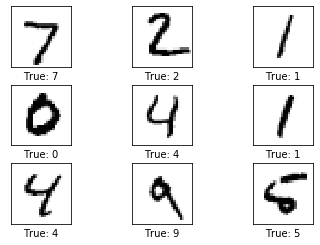

In [8]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images, cls_true=cls_true)

In [0]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
y = tf.placeholder('float')

In [0]:
x1 = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x1')
y1 = tf.placeholder('float')

In [0]:
x2 = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x2')
y2 = tf.placeholder('float')

In [0]:
x_t = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x_t')
y_t = tf.placeholder('float')

In [0]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
x_image1 = tf.reshape(x1, [-1, img_size, img_size, num_channels])
x_image2 = tf.reshape(x2, [-1, img_size, img_size, num_channels])

In [0]:
x_image_t = tf.reshape(x_t, [-1, img_size, img_size, num_channels])

In [0]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true1 = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true1')
y_true2= tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true2')

In [0]:
y_true_t= tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true_t')

In [0]:
y_true_cls = tf.argmax(y_true, dimension=1)
y_true_cls1 = tf.argmax(y_true1, dimension=1)
y_true_cls2 = tf.argmax(y_true2, dimension=1)

In [0]:
y_true_cls_t = tf.argmax(y_true_t, dimension=1)


In [19]:
# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',filters=25, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',filters=36, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
print(net)

Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 36), dtype=float32)


In [20]:
# layer_conv1
net1 = tf.layers.conv2d(inputs=x_image1, name='layer_conv11', padding='same',filters=49, kernel_size=5, activation=tf.nn.relu)
net1 = tf.layers.max_pooling2d(inputs=net1, pool_size=2, strides=2)
# layer_conv2
net1 = tf.layers.conv2d(inputs=net1, name='layer_conv21', padding='same',filters=64, kernel_size=5, activation=tf.nn.relu)
net1 = tf.layers.max_pooling2d(inputs=net1, pool_size=2, strides=2)
print(net1)

Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 7, 7, 64), dtype=float32)


In [21]:
# layer_conv1
net2 = tf.layers.conv2d(inputs=x_image2, name='layer_conv12', padding='same',filters=81, kernel_size=5, activation=tf.nn.relu)
net2 = tf.layers.max_pooling2d(inputs=net2, pool_size=2, strides=2)
# layer_conv2
net2 = tf.layers.conv2d(inputs=net2, name='layer_conv22', padding='same',filters=100, kernel_size=5, activation=tf.nn.relu)
net2 = tf.layers.max_pooling2d(inputs=net2, pool_size=2, strides=2)
print(net2)

Tensor("max_pooling2d_5/MaxPool:0", shape=(?, 7, 7, 100), dtype=float32)


In [22]:
net = tf.layers.flatten(net)
print(net)

Tensor("flatten/Reshape:0", shape=(?, 1764), dtype=float32)


In [23]:
net1 = tf.layers.flatten(net1)
print(net1)

Tensor("flatten_1/Reshape:0", shape=(?, 3136), dtype=float32)


In [24]:
net2 = tf.layers.flatten(net2)
print(net2)

Tensor("flatten_2/Reshape:0", shape=(?, 4900), dtype=float32)


In [25]:
net = tf.layers.dense(inputs=net, name='layer_fc1',units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',units=num_classes, activation=None)
print(logits)

Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)


In [26]:
net1 = tf.layers.dense(inputs=net1, name='layer_fc11',units=128, activation=tf.nn.relu)
logits1 = tf.layers.dense(inputs=net1, name='layer_fc_out1',units=num_classes, activation=None)
print(logits1)

Tensor("layer_fc_out1/BiasAdd:0", shape=(?, 10), dtype=float32)


In [27]:
net2 = tf.layers.dense(inputs=net2, name='layer_fc12',units=128, activation=tf.nn.relu)
logits2 = tf.layers.dense(inputs=net2, name='layer_fc_out2',units=num_classes, activation=None)
print(logits2)

Tensor("layer_fc_out2/BiasAdd:0", shape=(?, 10), dtype=float32)


In [0]:
y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [0]:
y_pred1 = tf.nn.softmax(logits=logits1)
y_pred_cls1 = tf.argmax(y_pred1, dimension=1)

In [0]:
y_pred2 = tf.nn.softmax(logits=logits2)
y_pred_cls2 = tf.argmax(y_pred2, dimension=1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)

In [0]:
cross_entropy1 = tf.nn.softmax_cross_entropy_with_logits(labels=y_true1, logits=logits1)

In [0]:
cross_entropy2 = tf.nn.softmax_cross_entropy_with_logits(labels=y_true2, logits=logits2)

In [34]:
loss = tf.reduce_mean(cross_entropy)
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [35]:
loss1 = tf.reduce_mean(cross_entropy1)
loss1

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [36]:
loss2 = tf.reduce_mean(cross_entropy2)
loss2

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [0]:
opt = tf.train.AdamOptimizer(learning_rate=1e-4)
optimizer = opt.minimize(loss)

In [0]:
opt1 = tf.train.AdamOptimizer(learning_rate=1e-4)
optimizer1 = opt1.minimize(loss1)

In [0]:
opt2 = tf.train.AdamOptimizer(learning_rate=1e-4)
optimizer2 = opt2.minimize(loss2)

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
correct_prediction1 = tf.equal(y_pred_cls1, y_true_cls1)
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

In [0]:
correct_prediction2 = tf.equal(y_pred_cls2, y_true_cls2)
accuracy2 = tf.reduce_mean(tf.cast(correct_prediction2, tf.float32))

In [0]:
trainable_var_list = tf.trainable_variables()

In [0]:
def get_weights_variable(layer_name):
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')
    return variable

In [45]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')
print(weights_conv1)
print(weights_conv2)

weights_fc1 = get_weights_variable(layer_name='layer_fc1')
weights_fc_out = get_weights_variable(layer_name='layer_fc_out')
print(weights_fc1)
print(weights_fc_out)

<tf.Variable 'layer_conv1/kernel:0' shape=(5, 5, 1, 25) dtype=float32_ref>
<tf.Variable 'layer_conv2/kernel:0' shape=(5, 5, 25, 36) dtype=float32_ref>
<tf.Variable 'layer_fc1/kernel:0' shape=(1764, 128) dtype=float32_ref>
<tf.Variable 'layer_fc_out/kernel:0' shape=(128, 10) dtype=float32_ref>


In [46]:
weights_conv11 = get_weights_variable(layer_name='layer_conv11')
weights_conv21 = get_weights_variable(layer_name='layer_conv21')
print(weights_conv11)
print(weights_conv21)

weights_fc11 = get_weights_variable(layer_name='layer_fc11')
weights_fc_out1 = get_weights_variable(layer_name='layer_fc_out1')
print(weights_fc11)
print(weights_fc_out1)

<tf.Variable 'layer_conv11/kernel:0' shape=(5, 5, 1, 49) dtype=float32_ref>
<tf.Variable 'layer_conv21/kernel:0' shape=(5, 5, 49, 64) dtype=float32_ref>
<tf.Variable 'layer_fc11/kernel:0' shape=(3136, 128) dtype=float32_ref>
<tf.Variable 'layer_fc_out1/kernel:0' shape=(128, 10) dtype=float32_ref>


In [47]:
weights_conv12 = get_weights_variable(layer_name='layer_conv12')
weights_conv22 = get_weights_variable(layer_name='layer_conv22')
print(weights_conv12)
print(weights_conv22)

weights_fc12= get_weights_variable(layer_name='layer_fc12')
weights_fc_out2 = get_weights_variable(layer_name='layer_fc_out2')
print(weights_fc12)
print(weights_fc_out2)

<tf.Variable 'layer_conv12/kernel:0' shape=(5, 5, 1, 81) dtype=float32_ref>
<tf.Variable 'layer_conv22/kernel:0' shape=(5, 5, 81, 100) dtype=float32_ref>
<tf.Variable 'layer_fc12/kernel:0' shape=(4900, 128) dtype=float32_ref>
<tf.Variable 'layer_fc_out2/kernel:0' shape=(128, 10) dtype=float32_ref>


In [0]:
session = tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

In [50]:
grads = tf.gradients(loss, weights_fc_out)[0]
print(grads)

Tensor("gradients_3/layer_fc_out/MatMul_grad/MatMul_1:0", shape=(128, 10), dtype=float32)


In [51]:
hessian = tf.reduce_sum(tf.hessians(loss, weights_fc_out)[0], axis = 2)
print(hessian)

Tensor("Sum:0", shape=(128, 10, 10), dtype=float32)


In [0]:
train_batch_size = 100

In [0]:
# Counter for total number of iterations performed so far.
total_iterations = 0
los_list = []
acc_list = []
grad_list = []
hess_list = []
eig_list = []
min_ratio_list = []
import numpy as np
import math

def optimize(num_iterations):
    global total_iterations
    min_ratio = 0
    

    for i in range(total_iterations,total_iterations + num_iterations):
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)
        feed_dict_train = {x: x_batch,y_true: y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i % 10 == 0:
            eig_list =[]
            los, acc = session.run([loss, accuracy], feed_dict=feed_dict_train)            
            grads_vals, hess_vals = session.run([grads, hessian], feed_dict=feed_dict_train)
            msg = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"
            print(msg.format(i + 1, los, acc))
            
            #los_list1.append(los)
            acc_list.append(acc)
            norm = math.sqrt(sum([sum(pow(grads_val,2)) for grads_val in grads_vals]))
            grad_list.append(norm)
            eigs = np.linalg.eigvals(hess_vals)
            for j in range(len(eigs)):
              for k in range(10):
                if(eigs[j][k]>0):
                  eig_list.append(eigs[j][k])
            min_ratio = len(eig_list)/(len(eigs)*10)
            min_ratio_list.append(min_ratio)
            los_list.append(los)
            #print(min_ratio)
    total_iterations += num_iterations
    #return min_ratio



In [54]:
len(los_list)

0

In [55]:
optimize(num_iterations=1000)

Epoch:      1, Training Loss: 2.29851, Training Accuracy:  13.0%
Epoch:     11, Training Loss: 2.29543, Training Accuracy:  19.0%
Epoch:     21, Training Loss: 2.30379, Training Accuracy:  14.0%
Epoch:     31, Training Loss: 2.29002, Training Accuracy:  15.0%
Epoch:     41, Training Loss: 2.30224, Training Accuracy:  12.0%
Epoch:     51, Training Loss: 2.3059, Training Accuracy:   7.0%
Epoch:     61, Training Loss: 2.31321, Training Accuracy:   8.0%
Epoch:     71, Training Loss: 2.30633, Training Accuracy:   7.0%
Epoch:     81, Training Loss: 2.30099, Training Accuracy:  11.0%
Epoch:     91, Training Loss: 2.30442, Training Accuracy:   8.0%
Epoch:    101, Training Loss: 2.29153, Training Accuracy:  12.0%
Epoch:    111, Training Loss: 2.29504, Training Accuracy:  12.0%
Epoch:    121, Training Loss: 2.31603, Training Accuracy:  10.0%
Epoch:    131, Training Loss: 2.30516, Training Accuracy:   8.0%
Epoch:    141, Training Loss: 2.30708, Training Accuracy:   8.0%
Epoch:    151, Training Lo

No handles with labels found to put in legend.


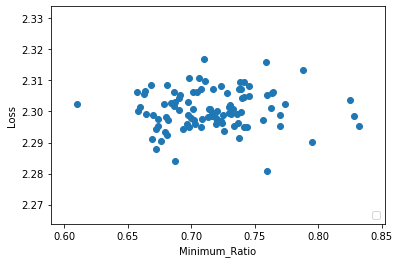

In [56]:
len(min_ratio_list)
len(los_list)
plt.figure()
plt.scatter(min_ratio_list, los_list)
plt.xlabel('Minimum_Ratio')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [0]:
test_batch_size = 256
def print_test_accuracy():
    num_test = len(data.test.images)
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    i = 0

    while i < num_test:
        j = min(i + test_batch_size, num_test)
        images = data.test.images[i:j, :]
        labels = data.test.labels[i:j, :]
        feed_dict = {x: images,y_true: labels}
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
        i = j
    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls
    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)
    correct_sum = correct.sum()
    acc = float(correct_sum) / num_test
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

In [58]:
w = session.run(weights_fc_out)
w

array([[ 0.14437781, -0.05333991,  0.20092174, ...,  0.12322905,
        -0.16992833, -0.04269646],
       [-0.11046   , -0.17175907, -0.0245756 , ..., -0.16836189,
         0.0285311 , -0.05030591],
       [ 0.00233162,  0.16704448, -0.07424434, ..., -0.02103476,
         0.05926802, -0.03362956],
       ...,
       [-0.05690404,  0.08536825, -0.00734294, ..., -0.114608  ,
        -0.2003352 ,  0.03964776],
       [-0.13891202,  0.16273865,  0.11994205, ..., -0.1521724 ,
         0.06763982,  0.12533851],
       [ 0.11478909,  0.11954934,  0.2016653 , ..., -0.11365926,
         0.17036909, -0.20311883]], dtype=float32)

In [59]:
print_test_accuracy()

Accuracy on Test-Set: 11.3% (1128 / 10000)


In [0]:
#optimize(num_iterations=1)

In [61]:
w = session.run(weights_fc_out)
w

array([[ 0.14437781, -0.05333991,  0.20092174, ...,  0.12322905,
        -0.16992833, -0.04269646],
       [-0.11046   , -0.17175907, -0.0245756 , ..., -0.16836189,
         0.0285311 , -0.05030591],
       [ 0.00233162,  0.16704448, -0.07424434, ..., -0.02103476,
         0.05926802, -0.03362956],
       ...,
       [-0.05690404,  0.08536825, -0.00734294, ..., -0.114608  ,
        -0.2003352 ,  0.03964776],
       [-0.13891202,  0.16273865,  0.11994205, ..., -0.1521724 ,
         0.06763982,  0.12533851],
       [ 0.11478909,  0.11954934,  0.2016653 , ..., -0.11365926,
         0.17036909, -0.20311883]], dtype=float32)

In [62]:
print_test_accuracy()

Accuracy on Test-Set: 11.3% (1128 / 10000)


In [0]:
#%%time
#optimize(num_iterations=99)


In [63]:
print_test_accuracy()

Accuracy on Test-Set: 11.3% (1128 / 10000)


In [0]:
def plot_conv_weights(weights, input_channel=0):

    w = session.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)
    num_filters = w.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = w[:, :, input_channel, i]
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')

        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

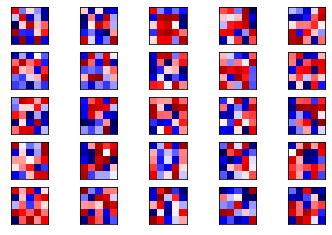

In [65]:
plot_conv_weights(weights=weights_conv1)

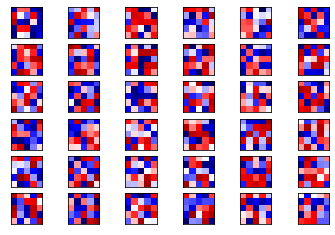

In [66]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

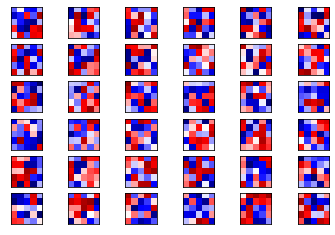

In [67]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

In [0]:
from sklearn.decomposition import PCA
def plot_fc_weights(weights_list):
    # Assume weights in weights_list are TensorFlow ops for 2-dim variables
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w_list = session.run(weights_list)
    
    pca = PCA(n_components=2)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    for w in w_list:
            
        print(w.shape)

        principalComponents = pca.fit_transform(w)

        ax.scatter(principalComponents[:,0], principalComponents[:,1], label=w.shape, alpha=0.5)

    ax.legend()
    plt.show()



In [69]:
#w_list = []
for i in range(24):  
  optimize(num_iterations=3) # We already performed 1 iteration above.
#  w = session.run(weights_fc_out)
#  w_list.append(w)

Epoch:   1001, Training Loss: 2.30788, Training Accuracy:   5.0%
Epoch:   1011, Training Loss: 2.30438, Training Accuracy:   9.0%
Epoch:   1021, Training Loss: 2.30082, Training Accuracy:   8.0%
Epoch:   1031, Training Loss: 2.30983, Training Accuracy:   8.0%
Epoch:   1041, Training Loss: 2.30719, Training Accuracy:   7.0%
Epoch:   1051, Training Loss: 2.29812, Training Accuracy:  14.0%
Epoch:   1061, Training Loss: 2.30587, Training Accuracy:   9.0%
Epoch:   1071, Training Loss: 2.30213, Training Accuracy:   7.0%


(128, 10)


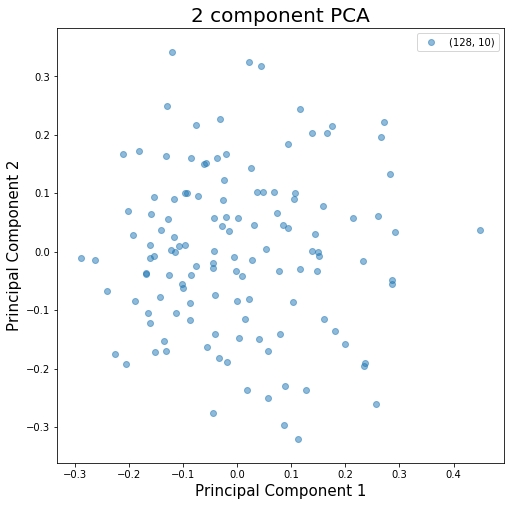

In [70]:
plot_fc_weights(weights_list=[weights_fc_out])

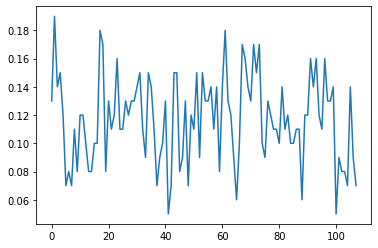

In [71]:
import matplotlib.pyplot as plt
plt.plot(acc_list)

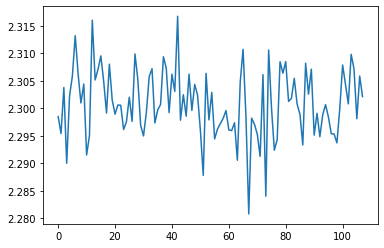

In [72]:
plt.plot(los_list)

In [0]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

grad_norm = []
def train_epoch_end_signal(network):
    global grad_norm
    # Get gradient for the last layer
    grad_norm.append(norm(network.gradients[-1]))

Text(0, 0.5, 'Norm')

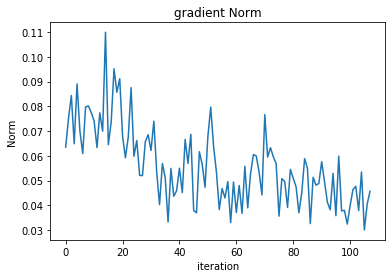

In [74]:
plt.plot(grad_list)
plt.title('gradient Norm')
plt.xlabel('iteration')
plt.ylabel('Norm')


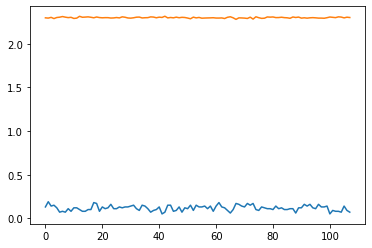

In [85]:
plt.plot(acc_list,label = 'Accuracy')
plt.plot(los_list,label = ' loss')

In [0]:
session1 = tf.Session()

In [0]:
session1.run(tf.global_variables_initializer())

In [77]:
grads1 = tf.gradients(loss1, weights_fc_out1)[0]
print(grads1)

Tensor("gradients_5/layer_fc_out1/MatMul_grad/MatMul_1:0", shape=(128, 10), dtype=float32)


In [78]:
hessian1 = tf.reduce_sum(tf.hessians(loss1, weights_fc_out1)[0], axis = 2)
print(hessian1)

Tensor("Sum_1:0", shape=(128, 10, 10), dtype=float32)


In [0]:
# Counter for total number of iterations performed so far.
total_iterations1 = 0
los_list1 = []
acc_list1 = []
grad_list1 = []
hess_list1 = []
import numpy as np
import math

def optimize(num_iterations1):
    global total_iterations1

    for i in range(total_iterations1,total_iterations1 + num_iterations1):
        x_batch1, y_true_batch1 = data.train.next_batch(train_batch_size)
        feed_dict_train1 = {x1: x_batch1,y_true1: y_true_batch1}
        session.run(optimizer1, feed_dict=feed_dict_train1)
        w1 = session.run(weights_fc_out1)
        if i % 10 == 0:
            los1, acc1 = session.run([loss1, accuracy1], feed_dict=feed_dict_train1)            
            grads_vals1, hess_vals1 = session.run([grads1, hessian1], feed_dict=feed_dict_train1)
            msg1 = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"
            print(msg1.format(i + 1, los1, acc1))
            los_list1.append(los1)
            acc_list1.append(acc1)
            norm1 = math.sqrt(sum([sum(pow(grads_val1,2)) for grads_val1 in grads_vals1]))
            grad_list1.append(norm1)
        #grad_list.append(np.linalg.norm(grads_vals))
            hess_list1.append((hess_vals1))
    total_iterations1 += num_iterations1


In [80]:
%%time
optimize(num_iterations1=999) # We already performed 1 iteration above.


Epoch:      1, Training Loss: 2.29114, Training Accuracy:  14.0%
Epoch:     11, Training Loss: 2.29927, Training Accuracy:  13.0%
Epoch:     21, Training Loss: 2.30202, Training Accuracy:  12.0%
Epoch:     31, Training Loss: 2.28965, Training Accuracy:  15.0%
Epoch:     41, Training Loss: 2.29047, Training Accuracy:  16.0%
Epoch:     51, Training Loss: 2.30737, Training Accuracy:   8.0%
Epoch:     61, Training Loss: 2.30617, Training Accuracy:  10.0%
Epoch:     71, Training Loss: 2.30499, Training Accuracy:   8.0%
Epoch:     81, Training Loss: 2.29754, Training Accuracy:  16.0%
Epoch:     91, Training Loss: 2.30225, Training Accuracy:  13.0%
Epoch:    101, Training Loss: 2.3069, Training Accuracy:   7.0%
Epoch:    111, Training Loss: 2.28729, Training Accuracy:  13.0%
Epoch:    121, Training Loss: 2.30646, Training Accuracy:  10.0%
Epoch:    131, Training Loss: 2.30166, Training Accuracy:  10.0%
Epoch:    141, Training Loss: 2.3028, Training Accuracy:  10.0%
Epoch:    151, Training Los

In [81]:
print_test_accuracy()

Accuracy on Test-Set: 10.9% (1092 / 10000)


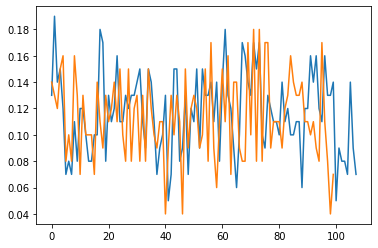

In [82]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.plot(acc_list1)

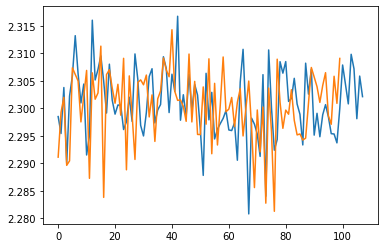

In [83]:
plt.plot(los_list)
plt.plot(los_list1)

In [0]:
session2 = tf.Session()

In [0]:
session2.run(tf.global_variables_initializer())

In [0]:
grads2 = tf.gradients(loss2, weights_fc_out2)[0]
print(grads2)

Tensor("gradients_7/layer_fc_out2/MatMul_grad/MatMul_1:0", shape=(128, 10), dtype=float32)


In [0]:
hessian2 = tf.reduce_sum(tf.hessians(loss2, weights_fc_out2)[0], axis = 2)
print(hessian2)

Tensor("Sum_2:0", shape=(128, 10, 10), dtype=float32)


In [0]:
# Counter for total number of iterations performed so far.
total_iterations2 = 0
los_list2 = []
acc_list2 = []
grad_list2 = []
hess_list2 = []


def optimize(num_iterations2):
    global total_iterations2

    for i in range(total_iterations2,total_iterations2 + num_iterations2):
        x_batch2, y_true_batch2 = data.train.next_batch(train_batch_size)
        feed_dict_train2 = {x2: x_batch2,y_true2: y_true_batch2}
        session.run(optimizer2, feed_dict=feed_dict_train2)
        w2 = session.run(weights_fc_out2)
        if i % 10 == 0:
            los2, acc2 = session.run([loss2, accuracy2], feed_dict=feed_dict_train2)            
            grads_vals2, hess_vals2 = session.run([grads2, hessian2], feed_dict=feed_dict_train2)
            msg2 = "Epoch: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"
            print(msg2.format(i + 1, los2, acc2))
            los_list2.append(los2)
            acc_list2.append(acc2)
            norm2 = math.sqrt(sum([sum(pow(grads_val2,2)) for grads_val2 in grads_vals2]))
            grad_list.append(norm2)
        #grad_list.append(np.linalg.norm(grads_vals))
            hess_list.append(np.linalg.norm(hess_vals2))
    total_iterations2 += num_iterations2



In [0]:
%%time
optimize(num_iterations2=999) # We already performed 1 iteration above.

Epoch:      1, Training Loss: 2.28188, Training Accuracy:  24.0%
Epoch:     11, Training Loss: 2.16132, Training Accuracy:  36.0%
Epoch:     21, Training Loss: 1.99542, Training Accuracy:  57.0%
Epoch:     31, Training Loss: 1.73672, Training Accuracy:  70.0%
Epoch:     41, Training Loss: 1.40018, Training Accuracy:  74.0%
Epoch:     51, Training Loss: 1.03106, Training Accuracy:  72.0%
Epoch:     61, Training Loss: 0.822908, Training Accuracy:  79.0%
Epoch:     71, Training Loss: 0.582336, Training Accuracy:  84.0%
Epoch:     81, Training Loss: 0.539115, Training Accuracy:  87.0%
Epoch:     91, Training Loss: 0.549707, Training Accuracy:  85.0%
Epoch:    101, Training Loss: 0.356128, Training Accuracy:  91.0%
Epoch:    111, Training Loss: 0.378514, Training Accuracy:  87.0%
Epoch:    121, Training Loss: 0.333621, Training Accuracy:  93.0%
Epoch:    131, Training Loss: 0.368142, Training Accuracy:  88.0%
Epoch:    141, Training Loss: 0.296021, Training Accuracy:  92.0%
Epoch:    151, T

In [0]:
print_test_accuracy()

Accuracy on Test-Set: 95.7% (9572 / 10000)


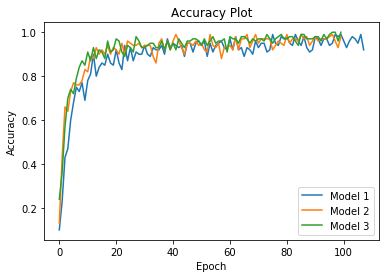

In [0]:
import matplotlib.pyplot as plt

plt.plot(acc_list,label = 'Model 1')
plt.plot(acc_list1,label = 'Model 2')
plt.plot(acc_list2,label = 'Model 3')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

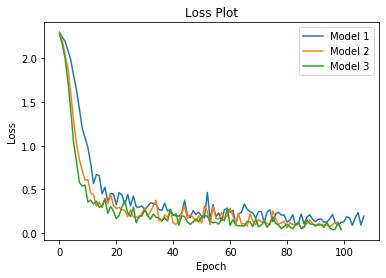

In [0]:

plt.plot(los_list,label = 'Model 1')
plt.plot(los_list1,label = 'Model 2')
plt.plot(los_list2,label = 'Model 3')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [0]:
data1 = input_data.read_data_sets('data/MNIST/', one_hot=True)
np.random.shuffle(data1.train.labels)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
